In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(542, 720)


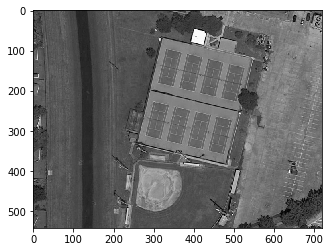

In [43]:
from skimage import io
img = io.imread("/DATA1/uttaran/DOTA/images/P1910.png", as_gray=True)
scale_percent = 10 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
img=np.array(img)
print(img.shape)
plt.imshow(img,cmap='gray')

In [44]:
def add_blur(image,c):
    data = np.zeros([image.shape[0],image.shape[1],1],dtype=np.int)
    if np.max(image) <= 1:
        image = np.ndarray.astype(image*255,dtype=np.int)
    if np.ndim(image)<3:
        image = image.reshape(image.shape[0],image.shape[1],1)
    channels = image.shape[-1]
#     print(channels)
    p = 0
    while p<channels:
        ch = []
        img = image[:,:,p:p+1]
        img = img.reshape(img.shape[0],img.shape[1])
#         print(img[333][333])
        i = 0
        while i<img.shape[0]:
            b = np.array([sum(img[i][current: current+c]/c) for current in range(0, img[i].shape[0]-c)])
            b = np.append(b,img[i][img.shape[1]-c:])
            ch.append(b)
            i+=1
        ch = np.array(ch).reshape(image.shape[0],image.shape[1],1)
        if np.count_nonzero(data) == 0:
            data = ch
            p+=1
            continue
        data=np.append(data,ch,axis=2)
        p+=1
#     print(data.shape,np.array(ch).shape)
    return np.ndarray.astype(data,np.int)

In [47]:
def remove_blur(image, c):
    data = np.zeros([image.shape[0], image.shape[1], 1], dtype=np.int)
    if np.max(image) <= 1:
        image = np.ndarray.astype(image * 255, dtype=np.int)
    if np.ndim(image) < 3:
        image = image.reshape(image.shape[0], image.shape[1], 1)
    channels = image.shape[-1]
    p = 0
    while p < channels:
        ch = []
        img = image[:, :, p:p + 1]
        img = img.reshape(img.shape[0], img.shape[1])
        i = 0
        while i < img.shape[0]:
            new_row = np.zeros(img.shape[1], dtype=np.int)
            #             print(img.shape)
#                                     print(img[i,:])
            A = np.diff(img[i, 0:-c])
            A = A*c*-1
            print(A)
            A = np.append(A, img[i, -c:])
            print("********************NEW COLUMN**************************")
            print("Orig",img[i,:])
            print("Diff",A)
            for k in range(0, c):
                temp = 0
                l, u = 0, 255
                for j in range(k, img.shape[1] - c, c):
                    
                    #                 print("Old temp = ",temp)
                    #                 print("Current element = ",A[j])

                    temp += A[j]
                    new_row[j + c] = temp
                    print("j ", j)
                    print("Temp ", temp)
                    print("Row ", new_row[j + c])
                    print("pointer ", j + c)
                    print("diff ", A[j])
                    #                 print("New temp = ",temp)
#                     print("Current u",u," ",temp, " ",u+temp)
                    if temp <= 0 and u > 255 + temp:
                        u = 255+temp
                    elif temp > 0 and l < 0 + temp:
                        l = temp
                    if l > u:
                        u = l
                    print("New limits = " + str(u) + " " + str(l) + "\n")
#                     input()
                new_row[k] = (l + u) / 2
                print("k ", k)
                print("Pixel ", new_row[k])
                print("Differences",new_row)
                for j in range(k + c, img.shape[1] - 1, c):
                    print("Current ",new_row[j]," ",j)
                    new_row[j] = new_row[k] - new_row[j]
                    print("New ",new_row[j]," ",j)
                np.put(new_row, np.arange(img.shape[1] - c, img.shape[1]),
                       img[i, img.shape[1] - c:])
                print(new_row)
#                 print(new_row.shape)
#                 input()
            ch.append(new_row)
            #             ch.append(img[-1][-1])
            i += 1

#             input()
        ch = np.array(ch).reshape(image.shape[0], image.shape[1], 1)
        if np.count_nonzero(data) == 0:
            data = ch
            p += 1
            continue
        data = np.append(data, ch, axis=2)
        p += 1


#     print(data.shape, np.array(ch).shape)
    return np.ndarray.astype(data, np.int)

In [51]:
%%capture
c = 10
blurred = add_blur(img,c)
deblurred = remove_blur(blurred,c)

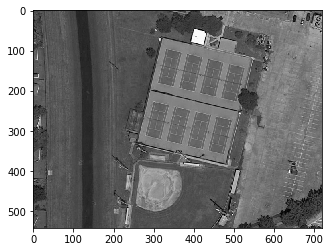

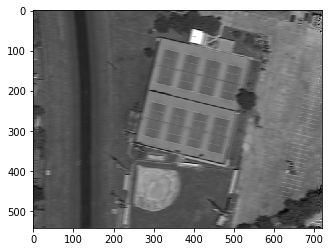

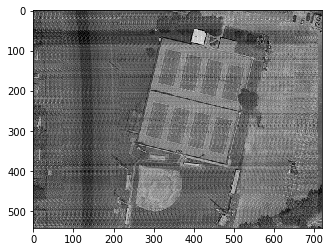

In [58]:
if blurred.shape[-1] == 1:
    blurred= blurred.reshape(data.shape[0],data.shape[1])
if deblurred.shape[-1] == 1:
    deblurred= deblurred.reshape(data.shape[0],data.shape[1])
plt.imshow(img,cmap='gray')
plt.show()
plt.imshow(blurred,cmap='gray')
plt.show()
plt.imshow(deblurred,cmap='gray')
plt.show()

In [39]:

# image = np.array([np.arange(0,200,10),np.random.randint(0,255,20)])
# print(image.shape)
# a = add_blur(image.reshape(image.shape[0],image.shape[1],1),3)
b = remove_blur(a,3)

[-30 -30 -30 -30 -30 -30 -30 -30 -30 -30 -30 -30 -30 -30 -30 -30]
********************NEW COLUMN**************************
Orig [ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 170
 180 190]
Diff [-30 -30 -30 -30 -30 -30 -30 -30 -30 -30 -30 -30 -30 -30 -30 -30 170 180
 190]
j  0
Temp  -30
Row  -30
pointer  3
diff  -30
New limits = 225 0

j  3
Temp  -60
Row  -60
pointer  6
diff  -30
New limits = 195 0

j  6
Temp  -90
Row  -90
pointer  9
diff  -30
New limits = 165 0

j  9
Temp  -120
Row  -120
pointer  12
diff  -30
New limits = 135 0

j  12
Temp  -150
Row  -150
pointer  15
diff  -30
New limits = 105 0

j  15
Temp  -180
Row  -180
pointer  18
diff  -30
New limits = 75 0

k  0
Pixel  37
Differences [  37    0    0  -30    0    0  -60    0    0  -90    0    0 -120    0
    0 -150    0    0 -180    0]
Current  -30   3
New  67   3
Current  -60   6
New  97   6
Current  -90   9
New  127   9
Current  -120   12
New  157   12
Current  -150   15
New  187   15
Current  -180   18
Ne

In [40]:
print(image[1])
print(a.reshape(a.shape[0],a.shape[1])[1])
print(b.reshape(b.shape[0],b.shape[1])[1])
print(b.reshape(b.shape[0],b.shape[1])[1][:-3])

[ 17  93 245 106 222 182 214 182  33  70 231 213 122 240 194 104 155 158
 207  60]
[118 148 191 170 206 192 143  94 111 171 188 191 185 179 151 139 173 158
 207  60]
[ 28 101 232 118 230 169 226 188  22  79 239 202 130 248 184 112 164 158
 207  60]
[ 28 101 232 118 230 169 226 188  22  79 239 202 130 248 184 112 164]
